In [78]:
import numpy as np
from pprint import pprint
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
import warnings
from itertools import product
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import accuracy_score
def my_accuracy(y_true, y_pred):
    y_pred = np.where(y_pred > 0.5, 1, 0)
    return accuracy_score(y_true, y_pred)

In [61]:
data = pd.read_pickle('all_features.pkl')
print(data.shape)
data.dropna(subset=['k1_bet365', 'k2_bet365'], inplace=True)
data.tail(5)

(44188, 656)


p2_filter_lag_1_max_points_in_a_row_match__median_7  \
date       p1          p2                                                                 
2020-11-21 Medvedev D. Nadal R.                                                   5.0     
           Nadal R.    Medvedev D.                                                7.0     
           Thiem D.    Djokovic N.                                                7.0     
2020-11-22 Medvedev D. Thiem D.                                                   6.0     
           Thiem D.    Medvedev D.                                                7.0     

                                    p1_lag_1_points_won_match__pctl10_28  \
date       p1          p2                                                  
2020-11-21 Medvedev D. Nadal R.                                     47.4   
           Nadal R.    Medvedev D.                                  58.7   
           Thiem D.    Djokovic N.                                  60.2   
2020-11-22 Medvedev D. Thiem D.                                     47.4   
           Thiem D.    Medvedev D.                                  60.2   

                                    p1_lag_1_second_serve_prc_match__pctl90_7  \
date       p1          p2                                                       
2020-11-21 Medvedev D. Nadal R.                                      0.962500   
           Nadal R.    Medvedev D.                                   1.000000   
           Thiem D.    Djokovic N.                                   0.974286   
2020-11-22 Medvedev D. Thiem D.                                      0.932143   
           Thiem D.    Medvedev D.                                   0.962500   

                                    p2_lag_1_second_serve_cnt_match__median_28  \
date       p1          p2                                                        
2020-11-21 Medvedev D. Nadal R.                                           23.0   
           Nadal R.    Medvedev D.                                        18.0   
           Thiem D.    Djokovic N.                                        22.0   
2020-11-22 Medvedev D. Thiem D.                                           31.0   
           Thiem D.    Medvedev D.                                        18.0   

                                    p2_filter_lag_1_max_points_in_a_row_match__pctl10_7  \
date       p1          p2                                                                 
2020-11-21 Medvedev D. Nadal R.                                                   4.0     
           Nadal R.    Medvedev D.                                                5.2     
           Thiem D.    Djokovic N.                                                3.6     
2020-11-22 Medvedev D. Thiem D.                                                   4.6     
           Thiem D.    Medvedev D.                                                5.2     

                                    p2_lag_1_first_serve_points_cnt_match__pctl90_28  \
date       p1          p2                                                              
2020-11-21 Medvedev D. Nadal R.                                                 52.9   
           Nadal R.    Medvedev D.                                              50.6   
           Thiem D.    Djokovic N.                                              45.3   
2020-11-22 Medvedev D. Thiem D.                                                 71.2   
           Thiem D.    Medvedev D.                                              48.6   

                                    p1_lag_1_receiver_points_won_match__pctl10_7  \
date       p1          p2                                                          
2020-11-21 Medvedev D. Nadal R.                                             24.6   
           Nadal R.    Medvedev D.                                          19.4   
           Thiem D.    Djokovic N.                                          13.6   
2020-11-22 Medvedev D. Thiem D.                

In [62]:
y = data['p1_win'].astype(int)
X = data.drop(['p1_win'], axis=1)
date_idx = X.index.get_level_values('date')

In [63]:
test_periods = [
    ('2019-01-01', '2019-04-01'),
    ('2019-04-01', '2019-07-01'),
    ('2019-07-01', '2019-10-01'),
    ('2019-10-01', '2020-04-01'),
    ('2020-08-01', '2020-11-01'),
]

for p in test_periods:
    n_test = data[(date_idx >= p[0]) & (date_idx < p[1])].shape[0]
    print('test period: {}, match count: {:,}'.format(p, n_test))

test period: ('2019-01-01', '2019-04-01'), match count: 2,190
test period: ('2019-04-01', '2019-07-01'), match count: 2,250
test period: ('2019-07-01', '2019-10-01'), match count: 2,256
test period: ('2019-10-01', '2020-04-01'), match count: 2,418
test period: ('2020-08-01', '2020-11-01'), match count: 1,826


In [64]:
test_from, test_to = test_periods[0]
X_test = X[(date_idx >= test_from) & (date_idx < test_to)]
y_test = y[(date_idx >= test_from) & (date_idx < test_to)]
X_train = X[(date_idx < test_from)]
y_train = y[(date_idx < test_from)]
## X_train = X[(date_idx < test_from) & (date_idx  >= '2016-01-01')]
## y_train = y[(date_idx < test_from) & (date_idx >= '2016-01-01')]

In [ ]:
pprint(model.best_score_)
pprint(model.best_params_)
# pprint(model.cv_results_)

In [79]:
class Accuracy:
    name = 'accuracy'
    higher_is_better = True
    @classmethod
    def calculate(cls, y_true, y_pred):
        y_pred = np.where(y_pred > 0.5, 1, 0)
        return accuracy_score(y_true, y_pred)


class LogLoss:
    name = 'logloss'
    higher_is_better = False
    @classmethod
    def calculate(cls, y_true, y_pred):
        return log_loss(y_true, y_pred)
print(Accuracy.calculate(np.array(true), np.array(prob_)))
print(LogLoss.calculate(np.array(true), np.array(prob_)))

0.6712979890310786
0.5951977403977481


In [65]:
# Fit / predict on multiple time periods
grid_params = {
        'learning_rate': [0.04],
        'max_depth': [4, 5],
        'subsample': [0.8],
        'colsample_bytree': [0.7, 0.8],
        'n_estimators': [200],
        'eval_metric': ['logloss']
}

# fit_params = {
#     'eval_metric': 'logloss',
#     'early_stopping_rounds': 10,
#     'verbose': False
# }

odds, prob, true, date = [], [], [], []

for period in test_periods:
    test_from, test_to = period

    X_test = X[(date_idx >= test_from) & (date_idx < test_to)]
    y_test = y[(date_idx >= test_from) & (date_idx < test_to)]
#     w_test = w[(date_idx >= test_from) & (date_idx < test_to)]

    X_train = X[date_idx < test_from]
    y_train = y[date_idx < test_from]
#     w_train = w[date_idx < test_from]
    
    cv = TimeSeriesSplit(n_splits=10)
    model_init = xgb.XGBClassifier(tree_method='hist', booster='gbtree', random_state=13)
    metric = make_scorer(my_accuracy)
    gsearch = GridSearchCV(
        model_init,
        grid_params,
        cv=cv,

#         fit_params=fit_params,
#         metrics=[LogLoss, Accuracy],
#         target_metric=LogLoss,
        scoring = metric,
        verbose=True
    )

    #gsearch.fit(X_train, y_train, w_train)
    gsearch.fit(X_train, y_train, pd.Series(np.ones(y_train.shape)));
#     print('{}: accuracy={}'.format(period, gsearch.cv_results['best']['accuracy_best']))
#     print('best params: {}'.format(gsearch.best_params))
#     print('best iteration :{}'.format(gsearch.best_model.best_iteration))
    
    odds.extend([tuple(x) for x in \
                 data[(date_idx >= test_from) & (date_idx < test_to)][['k1_bet365', 'k2_bet365']].values])
    prob.extend(gsearch.predict_proba(X_test))
    true.extend(y_test)
    date.extend(y_test.index.get_level_values('date'))

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [72]:
prob_ = []
for x in prob:
    prob_.append(x[1])

In [73]:
# Select best strategies
bet = 0.03
min_betting_rate = 0.01
min_bets_number = int(min_betting_rate * len(true))

strategies = [
    SimpleStrategy(bet, bet_on_strong=True),
    SimpleStrategy(bet, bet_on_strong=False),
]

for dp, pmin in product([-1, 0, 0.05, 0.1], [0.5, 0.6, 0.7, 0.8, 0.9]):
    strategies.append(PredictStrategy(bet, dp=dp, pmin=pmin))

for frac, pmin in product([0.03, 0.05, 0.1, 0.15], [0.5, 0.6, 0.7, 0.8, 0.9]):
    strategies.append(KellyStrategy(pmin=pmin, max_fraction=frac))
    
for pmin in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    strategies.append(ExpectationStrategy(bet, pmin=pmin))

performance = []
for s in strategies:
    n_bets, roi, roi_std, progress = s(true, prob_, odds)
    if n_bets < min_bets_number:
        continue
    performance.append(
        dict(n_bets=n_bets, roi=roi, roi_std=roi_std, progress=progress, name=s.name))

('2019-01-01', '2019-04-01')
('2019-04-01', '2019-07-01')
('2019-07-01', '2019-10-01')
('2019-10-01', '2020-04-01')
('2020-08-01', '2020-11-01')


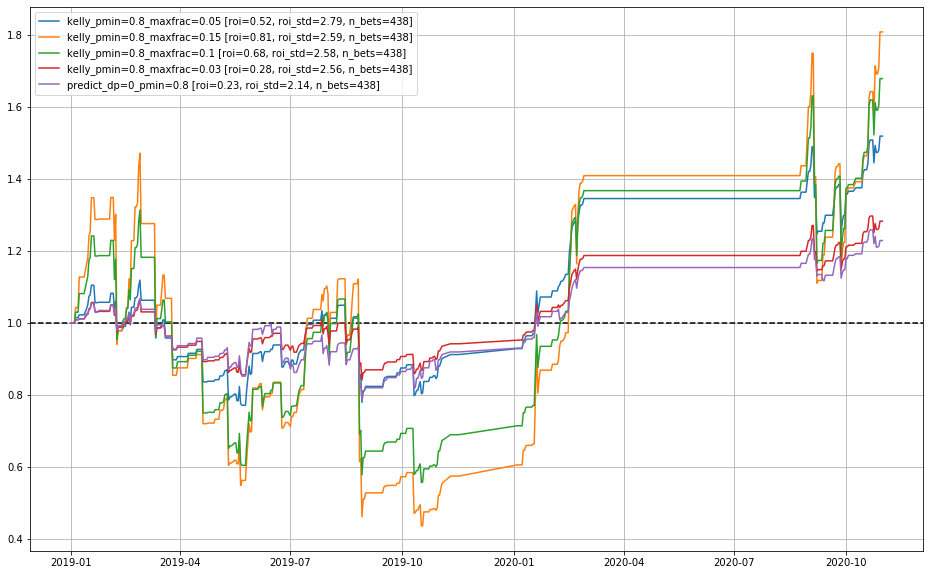

In [74]:
K = 5
performance_top = sorted(performance, key=lambda x: x['roi_std'], reverse=True)[:K]

fig, ax = plt.subplots(figsize=(16,10));
for p in performance_top:
    label = '{} [roi={:.2f}, roi_std={:.2f}, n_bets={:,}]'\
        .format(p['name'], p['roi'], p['roi_std'], p['n_bets'])
    df = pd.DataFrame({'date': date, 'progress': p['progress'][1:]}).groupby('date').tail(1)
    ax.plot(df['date'], df['progress'], label=label);

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
    
for period in test_periods:
    test_from, test_to = period
    print(period)
#     plt.vlines(x=test_from, ymin=ymin, ymax=ymax, color='k', ls='--')
    
plt.hlines(y=1, xmin=xmin, xmax=xmax, color='k', ls='--')
ax.grid();
ax.set_xlim(xmin, xmax);
ax.set_ylim(ymin, ymax);
ax.legend(loc='best');

In [53]:
class SimpleStrategy:
    """
    Naive strategy - always bet on stronger or weaker player.
    """
    def __init__(self, bet, bet_on_strong):
        self.name = 'favourite' if bet_on_strong else 'underdog'
        self.bet_on_strong = bet_on_strong
        self.bet = bet
    def __call__(self, y_true, y_prob, odds):
        n_bets = 0
        bet, bank_init, bank_curr = self.bet, 1, 1
        bank_progress = np.zeros(shape=len(y_true) + 1)
        bank_progress[0] = bank_init
        for i, true, (k1, k2) in zip(range(len(y_true)), y_true, odds):
            if not k1 >= 1 or not k2 >= 1 or k1 == k2:
                bank_progress[i+1] = bank_progress[i]
                continue
            n_bets += 1
            if self.bet_on_strong:
                if k1 < k2 and true == 1:
                    bank_curr += (k1 - 1) * bet
                elif k2 < k1 and true == 0:
                    bank_curr += (k2 - 1) * bet
                else:
                    bank_curr -= bet
            else:
                if k1 > k2 and true == 1:
                    bank_curr += (k1 - 1) * bet
                elif k2 > k1 and true == 0:
                    bank_curr += (k2 - 1) * bet
                else:
                    bank_curr -= bet
            if bank_curr < 0:
                bank_progress[i+1:] = 0
                break
            else:
                bank_progress[i+1] = bank_curr
        profit = max(bank_curr - bank_init, -bank_init)
        roi = profit / bank_init
        roi_std = roi / np.std(bank_progress)
        return n_bets, roi, roi_std, bank_progress
    
    
class PredictStrategy:
    """
    Bet on player if 2 conditions are met:
        1) predicted probability of his victory - implied probability 
            (from bookmaker odds) > threshold#1 ("dp")
        2) predicted probability of his victory > threshold#2 ("pmin")
    """
    def __init__(self, bet, dp, pmin):
        self.name = 'predict_dp={}_pmin={}'.format(dp, pmin)
        self.bet = bet
        self.dp = dp
        self.pmin = pmin
    def __call__(self, y_true, y_prob, odds):
        n_bets = 0
        bet, bank_init, bank_curr = self.bet, 1, 1
        bank_progress = np.zeros(shape=len(y_true) + 1)
        bank_progress[0] = bank_init
        for i, true, p1_prob, (k1, k2) in zip(range(len(y_true)), y_true, y_prob, odds):
            if not k1 >= 1 or not k2 >= 1 or k1 == k2:
                bank_progress[i+1] = bank_progress[i]
                continue
            p2_prob = 1 - p1_prob
            p1_odds, p2_odds = 1 / k1, 1 / k2
            if p1_prob - p1_odds > self.dp and p1_prob > self.pmin:
                n_bets += 1
                bank_curr = bank_curr + (k1 - 1) * bet if true == 1 else bank_curr - bet
            elif p2_prob - p2_odds > self.dp and p2_prob > self.pmin:
                n_bets += 1
                bank_curr = bank_curr + (k2 - 1) * bet if true == 0 else bank_curr - bet
            if bank_curr < 0:
                bank_progress[i+1:] = 0
                break
            else:
                bank_progress[i+1] = bank_curr
        profit = max(bank_curr - bank_init, -bank_init)
        roi = profit / bank_init
        roi_std = roi / np.std(bank_progress)
        return n_bets, roi, roi_std, bank_progress
    

class ExpectationStrategy:
    """
    Makes bet if expected value of profit > 0
    """
    def __init__(self, bet, pmin):
        self.name = 'expect_pmin={}'.format(pmin)
        self.bet = bet
        self.dp = dp
        self.pmin = pmin
    def __call__(self, y_true, y_prob, odds):
        n_bets = 0
        bet, bank_init, bank_curr = self.bet, 1, 1
        bank_progress = np.zeros(shape=len(y_true) + 1)
        bank_progress[0] = bank_init
        for i, true, p1_prob, (k1, k2) in zip(range(len(y_true)), y_true, y_prob, odds):
            if not k1 >= 1 or not k2 >= 1 or k1 == k2:
                bank_progress[i+1] = bank_progress[i]
                continue
            p2_prob = 1 - p1_prob
            p1_odds, p2_odds = 1 / k1, 1 / k2
            p1_expv = p1_prob * (k1 - 1) + p2_prob * (-1)
            p2_expv = p2_prob * (k2 - 1) + p1_prob * (-1)
            
            if (p1_expv > 0) and (p1_expv > p2_expv) and (p1_prob > self.pmin):
                n_bets += 1
                bank_curr = bank_curr + (k1 - 1) * bet if true == 1 else bank_curr - bet
            elif (p2_expv > 0) and (p2_expv > p1_expv) and (p2_prob > self.pmin):
                n_bets += 1
                bank_curr = bank_curr + (k2 - 1) * bet if true == 0 else bank_curr - bet
            if bank_curr < 0:
                bank_progress[i+1:] = 0
                break
            else:
                bank_progress[i+1] = bank_curr
        profit = max(bank_curr - bank_init, -bank_init)
        roi = profit / bank_init
        roi_std = roi / np.std(bank_progress)
        return n_bets, roi, roi_std, bank_progress
    
    
class KellyStrategy:
    """
    Betting strategy with non-constant bet size.
    """
    def __init__(self, pmin, max_fraction):
        self.name = 'kelly_pmin={}_maxfrac={}'.format(pmin, max_fraction)
        self.pmin = pmin
        self.max_fraction = max_fraction
    def __call__(self, y_true, y_prob, odds):
        n_bets = 0
        bank_init, bank_curr = 1, 1
        bank_progress = np.zeros(shape=len(y_true) + 1)
        bank_progress[0] = bank_init
        for i, true, p1_prob, (k1, k2) in zip(range(len(y_true)), y_true, y_prob, odds):
            if not k1 >= 1 or not k2 >= 1 or k1 == k2:
                bank_progress[i+1] = bank_progress[i]
                continue
            p2_prob = 1 - p1_prob
            bet1 = bank_curr * min((p1_prob - p2_prob / (k1 - 1)), self.max_fraction)
            bet2 = bank_curr * min((p2_prob - p1_prob / (k2 - 1)), self.max_fraction)
            if bet1 > 0 and p1_prob > self.pmin:
                n_bets += 1
                bank_curr = bank_curr + (k1 - 1) * bet1 if true == 1 else bank_curr - bet1
            elif bet2 > 0 and p2_prob > self.pmin:
                n_bets += 1
                bank_curr = bank_curr + (k2 - 1) * bet2 if true == 0 else bank_curr - bet2
            if bank_curr < 0:
                bank_progress[i+1:] = 0
                break
            else:
                bank_progress[i+1] = bank_curr
        profit = max(bank_curr - bank_init, -bank_init)
        roi = profit / bank_init
        roi_std = roi / np.std(bank_progress)
        return n_bets, roi, roi_std, bank_progress